## 1. Data Preprocessing
Read in the raw data, apply formatting and resave to local dir.

In [134]:
import pandas as pd
import numpy as np
import warnings
import sys
import re

sys.path.insert(0, './03_Codes')
from data_preprocess import parse_str2num

%matplotlib notebook

In [18]:
dir_raw_data = '01_Raw_Data/'
dir_out_data = '02_Processed_Data/'

In [19]:
raw_axjo = pd.read_csv(dir_raw_data + 'S&P_ASX200_(AXJO)_20191227.csv')\
             .loc[:, ['Date', 'Price', 'Vol.']]
raw_axpj = pd.read_csv(dir_raw_data + 'S&P_ASX200_REIT_(AXPJ)_20191227.csv')\
             .loc[:, ['Date', 'Price', 'Vol.']]

In [20]:
def clean_data(raw_df):
    # Parse datet column and set to index
    raw_df['Date'] = pd.to_datetime(raw_df['Date'])
    raw_df.index = raw_df['Date']

    # Convert price column to numeric
    raw_df['Price'] = raw_df['Price'].apply(lambda x: parse_str2num(x, scale=1))
    raw_df['Vol (M)'] = raw_df['Vol.'].apply(lambda x: parse_str2num(x, scale=1e6))
    raw_df1 = raw_df.drop(['Vol.', 'Date'], axis=1)
    raw_df2 = raw_df1.resample(rule='M').apply(lambda x:x[-1])
    raw_df2['Price Change'] = raw_df2['Price'].pct_change(1)
    
    return raw_df2

clean_data(raw_axjo).to_csv(dir_out_data+'asx200_axjo.csv')
clean_data(raw_axpj).to_csv(dir_out_data+'asx200_axpj.csv')

# 2. Analysis

In [71]:
import pandas as pd
import numpy as np
import warnings
import sys
import re

sys.path.insert(0, './03_Codes')
from data_preprocess import parse_str2num

%matplotlib notebook
# %matplotlib inline

In [56]:
dir_proc_data = '02_Processed_Data/'
asx_axjo = pd.read_csv(dir_proc_data+'asx200_axjo.csv', index_col=0)
asx_axpj = pd.read_csv(dir_proc_data+'asx200_axpj.csv', index_col=0)

def filter_range(raw_df, time_perd, cum_prod=True, col_name=None):
    raw_df.index = pd.to_datetime(raw_df.index)
    
    time_labl = (raw_df.index >= time_perd[0]) & (raw_df.index <= time_perd[1])
    raw_df = raw_df.loc[time_labl, :]
    
    if raw_df.iloc[0]['Price Change'] == np.nan:
        raw_df.iloc[0]['Price Change'] = 0
    
    raw_df[col_name+' Cum Prod'] = (raw_df[col_name]+1).cumprod()
    
    return raw_df

asx_axjo = filter_range(asx_axjo, ['2013-11-01', '2019-12-31'], col_name='Price Change')
asx_axpj = filter_range(asx_axpj, ['2013-11-01', '2019-12-31'], col_name='Price Change')


C:\Users\jiape\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<IPython.core.display.Javascript object>


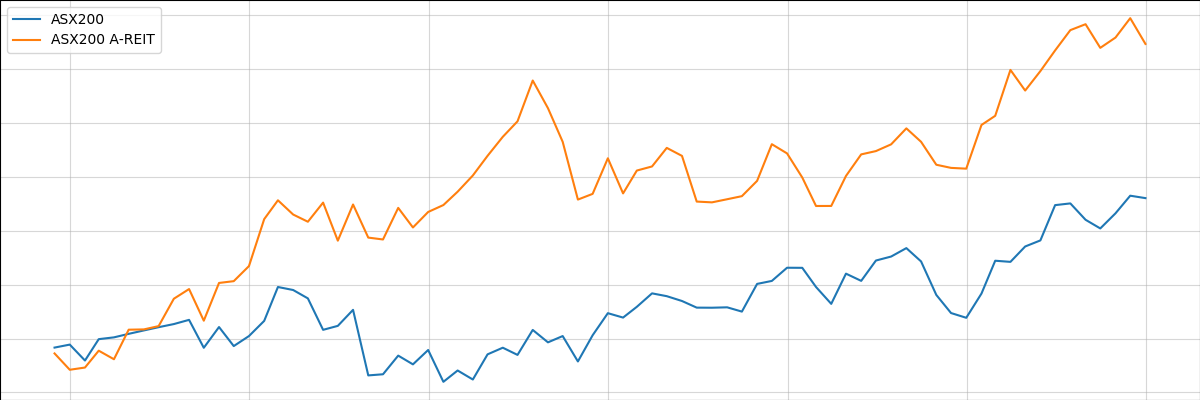

C:\Users\jiape\Anaconda3\lib\site-packages\matplotlib\figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


In [72]:
import matplotlib.pyplot as plt
from matplotlib import dates


fig = plt.figure(figsize=(12, 4))
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(asx_axjo.index, asx_axjo['Price Change Cum Prod'], label='ASX200')
ax.plot(asx_axpj.index, asx_axpj['Price Change Cum Prod'], label='ASX200 A-REIT')
plt.legend(loc=0)

ax.xaxis.set_major_locator(dates.YearLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n%Y'))

ax.xaxis.set_minor_locator(dates.MonthLocator((1,4,7,10)))
ax.xaxis.set_minor_formatter(dates.DateFormatter('%b'))

ax.set_xlabel('Date')
ax.yaxis.grid(True, alpha=0.5)
ax.xaxis.grid(True, alpha=0.5)

fig.autofmt_xdate()
plt.tight_layout()


# plt.show()

In [74]:
asx_axpj

,Price,Vol (M),Price Change,Price Change Cum Prod
Date,,,,
2013-11-30,1016.61,80.98,-0.027670,0.972330
2013-12-31,984.90,52.46,-0.031192,0.942001
2014-01-31,989.23,89.14,0.004396,0.946143
2014-02-28,1021.94,165.55,0.033066,0.977428
2014-03-31,1005.33,89.10,-0.016253,0.961541
...,...,...,...,...
2019-08-31,1655.70,96.25,0.006994,1.583584
2019-09-30,1609.80,79.27,-0.027722,1.539683
2019-10-31,1629.80,97.19,0.012424,1.558812
